In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bikes_df = pd.read_csv("bikes.csv")
shop_df = pd.read_csv("bikeshops.csv")
order_df = pd.read_csv("orders.csv")

In [ ]:
df_extended = pd.merge(order_df, shop_df, left_on='customer.id', right_on='bikeshop.id', how='inner')
df_extended = pd.merge(df_extended, bikes_df, left_on='product.id', right_on='bike.id')

df_extended = df_extended.assign(price_extended = df_extended['price'] * df_extended['quantity'])
df_extended = df_extended[['order.date', 'order.id', 'order.line', 'bikeshop.name', 
                            'model', 'quantity', 'price', 'price_extended',
                            'category1', 'category2', 'frame']]
df_extended = df_extended.sort_values(['order.id', 'order.line'])

# df_extended.head()

In [66]:
#phan nhom du lieu dua theo cac cot
df_grouped = df_extended.groupby(by=['bikeshop.name', 'model', 'category1', 'category2', 'frame', 'price'])
customer_trends = df_grouped.sum(numeric_only=True).reset_index()
#loai bo nhung cot khong dung den
customer_trends.drop(['order.id','order.line','price_extended'],axis='columns',inplace=True)
# customer_trends

In [67]:
#chuyen doi cot thanh hang
customer_trends = customer_trends.pivot(index=['model','category1','category2','frame','price'], columns='bikeshop.name', values='quantity').reset_index()
customer_trends = customer_trends.fillna(0)

# customer_trends.head()

In [68]:
customer_trends['price'] = pd.cut(customer_trends['price'], bins=2, labels=['[415, 3500)', '[3500,12790]'])
# customer_trends.head()

In [70]:
# chuyen dataframe sang numpy array
customer_trends_matrix = customer_trends.iloc[:, 5:].to_numpy()

# tinh phan tram theo tung cot
customerTrends_prop = customer_trends_matrix / customer_trends_matrix.sum(axis=0)

# ghep noi tro lai 
colnames = customer_trends.columns
customer_trends = pd.concat([customer_trends.iloc[:, :5], pd.DataFrame(customerTrends_prop)], axis=1)
customer_trends.columns = colnames

# customer_trends.head()

bikeshop.name,model,category1,category2,frame,price,Albuquerque Cycles,Ann Arbor Speed,Austin Cruisers,Cincinnati Speed,Columbus Race Equipment,...,Philadelphia Bike Shop,Phoenix Bi-peds,Pittsburgh Mountain Machines,Portland Bi-peds,Providence Bi-peds,San Antonio Bike Shop,San Francisco Cruisers,Seattle Race Equipment,Tampa 29ers,Wichita Speed
0,Bad Habit 1,Mountain,Trail,Aluminum,"[415, 3500)",0.017483,0.006645,0.008130,0.005115,0.010152,...,0.024490,0.011276,0.015915,0.010870,0.009225,0.021505,0.002674,0.015625,0.019417,0.005917
1,Bad Habit 2,Mountain,Trail,Aluminum,"[415, 3500)",0.006993,0.009967,0.004065,0.000000,0.000000,...,0.004082,0.019027,0.002653,0.010870,0.023985,0.000000,0.002674,0.007812,0.000000,0.000000
2,Beast of the East 1,Mountain,Trail,Aluminum,"[415, 3500)",0.010490,0.014950,0.008130,0.000000,0.000000,...,0.000000,0.012685,0.005305,0.010870,0.009225,0.005376,0.000000,0.015625,0.009709,0.000000
3,Beast of the East 2,Mountain,Trail,Aluminum,"[415, 3500)",0.010490,0.009967,0.008130,0.000000,0.005076,...,0.000000,0.023256,0.010610,0.015528,0.014760,0.010753,0.002674,0.023438,0.029126,0.001972
4,Beast of the East 3,Mountain,Trail,Aluminum,"[415, 3500)",0.003497,0.003322,0.000000,0.000000,0.002538,...,0.020408,0.016209,0.002653,0.020186,0.007380,0.032258,0.000000,0.007812,0.009709,0.000000


In [71]:
# Loai bo 5 cot dau tien
kmeansDat = customer_trends.iloc[:, 5:]

# Chuyen vi
kmeansDat_t = kmeansDat.T

# kmeansDat_t.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
bikeshop.name,,,,,,,,,,,,,,,,,,,,,
Albuquerque Cycles,0.017483,0.006993,0.01049,0.010490,0.003497,0.013986,0.006993,0.000000,0.013986,0.048951,...,0.000000,0.000000,0.003497,0.006993,0.017483,0.010490,0.006993,0.003497,0.006993,0.006993
Ann Arbor Speed,0.006645,0.009967,0.01495,0.009967,0.003322,0.026578,0.014950,0.016611,0.014950,0.008306,...,0.009967,0.009967,0.014950,0.009967,0.003322,0.011628,0.000000,0.000000,0.000000,0.011628
Austin Cruisers,0.008130,0.004065,0.00813,0.008130,0.000000,0.020325,0.020325,0.004065,0.024390,0.008130,...,0.020325,0.016260,0.016260,0.016260,0.008130,0.008130,0.000000,0.000000,0.000000,0.016260
Cincinnati Speed,0.005115,0.000000,0.00000,0.000000,0.000000,0.015345,0.010230,0.015345,0.007673,0.017903,...,0.012788,0.000000,0.002558,0.002558,0.002558,0.000000,0.010230,0.007673,0.010230,0.020460
Columbus Race Equipment,0.010152,0.000000,0.00000,0.005076,0.002538,0.010152,0.027919,0.027919,0.025381,0.012690,...,0.015228,0.002538,0.002538,0.005076,0.000000,0.000000,0.010152,0.005076,0.017766,0.005076


In [87]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(kmeansDat_t)

unique_values, counts = np.unique(kmeans.labels_, return_counts=True)

print("Unique values:", unique_values)
print("Counts:", counts)
# 3 clusters voi size 21 6 3
# gia tri nay co the thay doi voi moi lan fit


Unique values: [0 1 2]
Counts: [21  6  3]


In [ ]:
# tam cum: la 1 matrix voi 3 dong, 97 cot 
print(kmeans.cluster_centers_)

# vector cum: cum ma khach hang thuoc ve
print(kmeans.labels_)

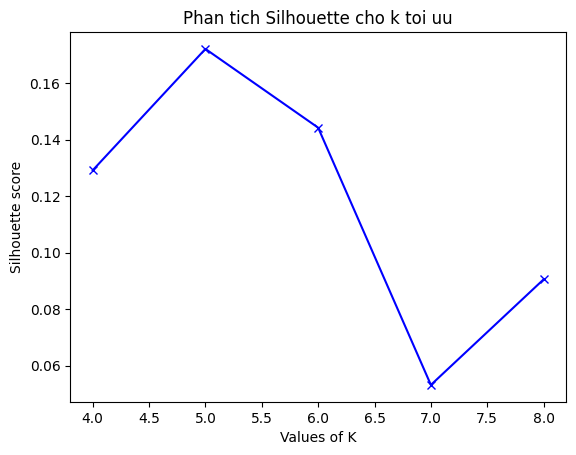

In [97]:
from sklearn.metrics import silhouette_score

min_clust = 4 # so luong cluster nho nhat
max_clust = 8 # so luong cluster lon nhat
range_n_clusters = range(min_clust, max_clust+1)
silhouette_avg = []

for num_clusters in range_n_clusters:
    # khoi tao kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(kmeansDat_t)
    cluster_labels = kmeans.labels_
 
    # diem silhouette 
    silhouette_avg.append(silhouette_score(kmeansDat_t, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Phan tich Silhouette cho k toi uu')
plt.show()

In [105]:
#Phan tich K-mean voi n=5
kmeans = KMeans(n_clusters=5)
kmeans.fit(kmeansDat_t)

silhouette_score(kmeansDat_t,kmeans.labels_)

0.16470218777098325

In [120]:
for cluster in range(5): 
    
    print(f'cluster #{cluster+1}: {kmeansDat_t.index[kmeans.labels_ == cluster]}')

cluster #1: Index(['Ithaca Mountain Climbers', 'Pittsburgh Mountain Machines',
       'Tampa 29ers'],
      dtype='object', name='bikeshop.name')
cluster #2: Index(['Albuquerque Cycles', 'Dallas Cycles', 'Denver Bike Shop',
       'Detroit Cycles', 'Kansas City 29ers', 'Los Angeles Cycles',
       'Minneapolis Bike Shop', 'New York Cycles', 'Philadelphia Bike Shop',
       'Phoenix Bi-peds', 'Portland Bi-peds', 'Providence Bi-peds',
       'San Antonio Bike Shop'],
      dtype='object', name='bikeshop.name')
cluster #3: Index(['Cincinnati Speed', 'Columbus Race Equipment', 'Las Vegas Cycles',
       'Louisville Race Equipment', 'San Francisco Cruisers', 'Wichita Speed'],
      dtype='object', name='bikeshop.name')
cluster #4: Index(['Ann Arbor Speed', 'Austin Cruisers', 'Miami Race Equipment',
       'Nashville Cruisers', 'New Orleans Velocipedes',
       'Oklahoma City Race Equipment', 'Seattle Race Equipment'],
      dtype='object', name='bikeshop.name')
cluster #5: Index(['Indianapo

In [138]:
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_).T
customer_trends_clustered = pd.concat([customer_trends.iloc[:,:5], cluster_centroids], axis=1)
customer_trends_clustered_X1 = customer_trends_clustered.sort_values(by=customer_trends_clustered.columns[5], ascending=False)[list(customer_trends_clustered.columns[:5]) + [customer_trends_clustered.columns[5]]]

customer_trends_clustered_X1.head(10)

,model,category1,category2,frame,price,0
49,Scalpel-Si Carbon 3,Mountain,Cross Country Race,Carbon,"[415, 3500)",0.034269
41,Jekyll Carbon 4,Mountain,Over Mountain,Carbon,"[415, 3500)",0.030282
45,Scalpel 29 Carbon Race,Mountain,Cross Country Race,Carbon,"[415, 3500)",0.028039
95,Trigger Carbon 3,Mountain,Over Mountain,Carbon,"[415, 3500)",0.025935
34,Habit Carbon 2,Mountain,Trail,Carbon,"[415, 3500)",0.023375
96,Trigger Carbon 4,Mountain,Over Mountain,Carbon,"[415, 3500)",0.023261
19,Catalyst 4,Mountain,Sport,Aluminum,"[415, 3500)",0.021564
39,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,"[415, 3500)",0.021079
65,Supersix Evo Hi-Mod Dura Ace 2,Road,Elite Road,Carbon,"[415, 3500)",0.021058
94,Trigger Carbon 2,Mountain,Over Mountain,Carbon,"[415, 3500)",0.021043
